# Logistic Regression

## Introduction

The banking industry in the USA is highly regulated. Banks are required to adhere to strict guidelines regarding the management of customer deposits, the maintaining of customer privacy, and the avoidance of discrimination when approving or rejecting loan applications (excerpt from assignments first paragraph). To check for any signs of discrimination, we will test whether a person who is black has faced discrimination in the banking industry.

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings


df = pd.read_csv("https://raw.githubusercontent.com/Ale-Man1/Logistic-Regression/main/HDMA_Boston_Housing_Data.csv")
pd.set_option('display.max_columns', None)
df.drop('index', inplace=True, axis=1)
warnings.simplefilter(action='ignore', category=FutureWarning)
df.index += 1
print(df)
df.dtypes
df.describe()

           dir       hir       lvr       ccs       mcs pbcr dmi self single  \
1     0.221000  0.221000  0.800000  5.000000  2.000000   no  no   no     no   
2     0.265000  0.265000  0.921875  2.000000  2.000000   no  no   no    yes   
3     0.372000  0.248000  0.920398  1.000000  2.000000   no  no   no     no   
4     0.320000  0.250000  0.860465  1.000000  2.000000   no  no   no     no   
5     0.360000  0.350000  0.600000  1.000000  1.000000   no  no   no     no   
...        ...       ...       ...       ...       ...  ...  ..  ...    ...   
2377  0.300000  0.300000  0.777049  1.000000  2.000000   no  no   no    yes   
2378  0.260000  0.200000  0.526761  2.000000  1.000000   no  no   no     no   
2379  0.320000  0.260000  0.753846  6.000000  1.000000  yes  no   no    yes   
2380  0.350000  0.260000  0.813559  2.000000  2.000000   no  no   no    yes   
2381  0.330814  0.255346  0.700783  2.116387  1.721008  NaN  no  NaN    yes   

          uria  comdominiom black deny  
1     3.90

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


## EDA

We will be exploring the data set to see if we can create a conclusion from it.

### Attribute 1: Debt Payments to Total Income Ratio (DIR)

count    2381.000000
mean        0.330814
std         0.107235
min         0.000000
25%         0.280000
50%         0.330000
75%         0.370000
max         3.000000
Name: dir, dtype: float64


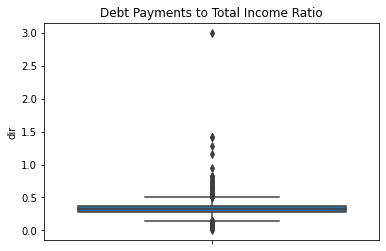

In [173]:
plt1_sns = sns.boxplot(data=df, y="dir").set(title="Debt Payments to Total Income Ratio") # Graph for EDA
plt1_sns;
print(df["dir"].describe()) # Describe to show stats

### Attribute 2: Housing Expenses to Income Ratio (HIR)

count    2381.000000
mean        0.255346
std         0.096635
min         0.000000
25%         0.214000
50%         0.260000
75%         0.298800
max         3.000000
Name: hir, dtype: float64


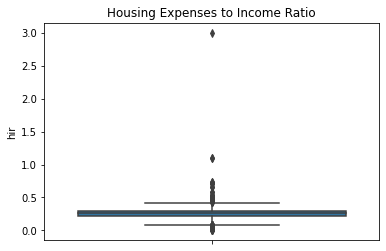

In [174]:
plt2_sns = sns.boxplot(data=df, y="hir").set(title="Housing Expenses to Income Ratio") # Graph for EDA
plt2_sns;
print(df["hir"].describe()) # Describe to show stats

### Attribute 3: Ratio of Size of Loan to Assessed Value of Property (LVR)

count    2381.000000
mean        0.737760
std         0.178715
min         0.020000
25%         0.652850
50%         0.779412
75%         0.868421
max         1.950000
Name: lvr, dtype: float64


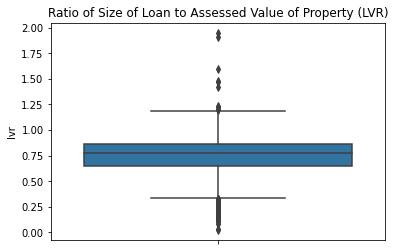

In [175]:
plt3_sns = sns.boxplot(data=df, y="lvr").set(title="Ratio of Size of Loan to Assessed Value of Property (LVR)") # Graph for EDA
plt3_sns;
print(df["lvr"].describe()) # Describe to show stats

### Attribute 4: Consumer Credit Score (CCS)

count    2381.000000
mean        2.116387
std         1.666370
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: ccs, dtype: float64


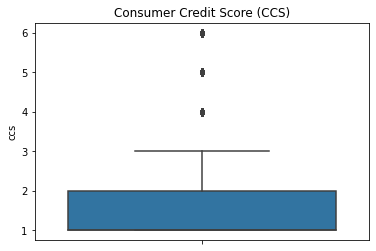

In [176]:
plt4_sns = sns.boxplot(data=df, y="ccs").set(title="Consumer Credit Score (CCS)") # Graph for EDA (1 is lowest, 6 is highest)
plt4_sns;
print(df["ccs"].describe()) # Describe to show stats

### Attribute 5: Mortgage Credit Score (MCS)

count    2381.000000
mean        1.721008
std         0.537169
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: mcs, dtype: float64


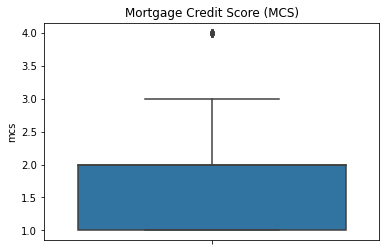

In [177]:
plt5_sns = sns.boxplot(data=df, y="mcs").set(title="Mortgage Credit Score (MCS)") # Graph for EDA (1 is lowest, 4 is highest)
plt5_sns;
print(df["mcs"].describe()) # Describe to show stats

### Attribute 6: Public Bad Credit Record (PBCR)

count     2380
unique       2
top         no
freq      2205
Name: pbcr, dtype: object


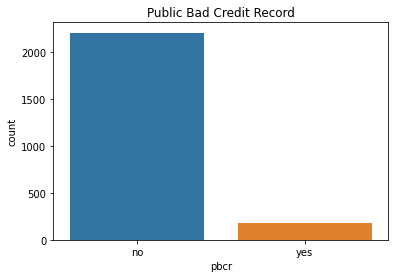

In [178]:
plt6_sns = sns.countplot(data=df, x="pbcr").set(title='Public Bad Credit Record') # Graph for EDA
plt6_sns;
print(df["pbcr"].describe()) # Describe to show stats

### Attribute 7: Denied Mortgage Insurance (DMI)

count     2381
unique       2
top         no
freq      2333
Name: dmi, dtype: object


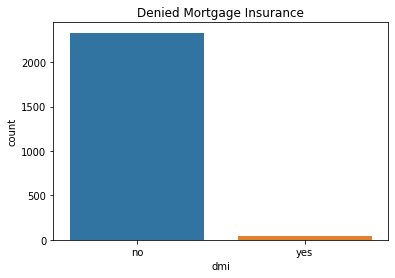

In [179]:
plt7_sns = sns.countplot(data=df, x="dmi").set(title='Denied Mortgage Insurance') # Graph for EDA
plt7_sns;
print(df["dmi"].describe()) # Describe to show stats

### Attribute 8: Self Employed (SELF)

count     2380
unique       2
top         no
freq      2103
Name: self, dtype: object


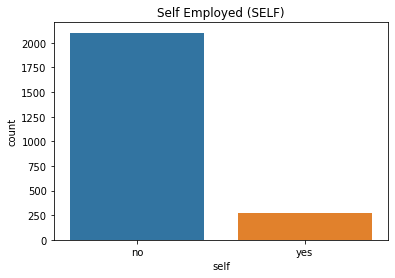

In [180]:
plt8_sns = sns.countplot(data=df, x="self").set(title='Self Employed (SELF)') # Graph for EDA
plt8_sns;
print(df["self"].describe()) # Describe to show stats

### Attribute 9: Is the Person Single? (SINGLE)

count     2381
unique       2
top         no
freq      1444
Name: single, dtype: object


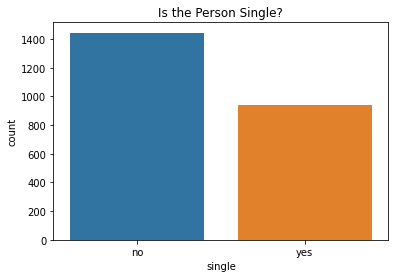

In [181]:
plt9_sns = sns.countplot(data=df, x="single").set(title='Is the Person Single?') # Graph for EDA
plt9_sns;
print(df["single"].describe()) # Describe to show stats

### Attribute 10: 1989 Massachusetts Unemployment Rate in the Applicant's Industry (uria)

count    2381.000000
mean        3.774496
std         2.026636
min         1.800000
25%         3.100000
50%         3.200000
75%         3.900000
max        10.600000
Name: uria, dtype: float64


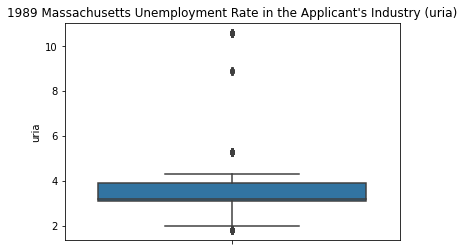

In [182]:
plt10_sns = sns.boxplot(data=df, y="uria").set(title="1989 Massachusetts Unemployment Rate in the Applicant's Industry (uria)") # Graph for EDA (1 is lowest, 4 is highest)
plt10_sns;
print(df["uria"].describe()) # Describe to show stats

### Attribute 11: Is Unit a Condominium? (condominium)

count    2381.000000
mean        0.288114
std         0.452980
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: comdominiom, dtype: float64


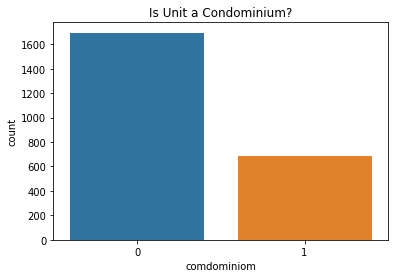

In [183]:
plt11_sns = sns.countplot(data=df, x="comdominiom").set(title='Is Unit a Condominium?') # Graph for EDA
plt11_sns;
print(df["comdominiom"].describe()) # Describe to show stats

### Attribute 12: Is the Person black? (black)

count     2381
unique       2
top         no
freq      2042
Name: black, dtype: object


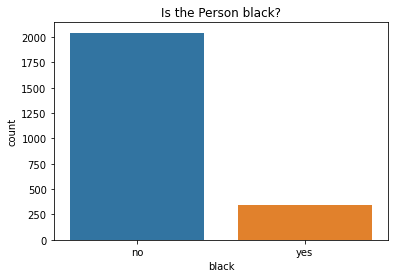

In [184]:
plt12_sns = sns.countplot(data=df, x="black").set(title='Is the Person black?') # Graph for EDA
plt12_sns;
print(df["black"].describe()) # Describe to show stats

### Attribute 13: Mortgage Application Denied? (deny)

count     2381
unique       2
top         no
freq      2096
Name: deny, dtype: object


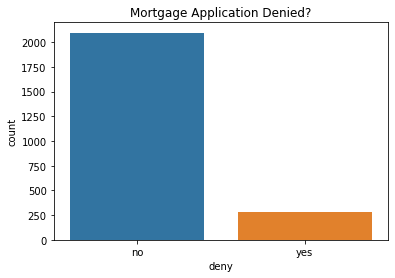

In [185]:
plt13_sns = sns.countplot(data=df, x="deny").set(title='Mortgage Application Denied?') # Graph for EDA
plt13_sns;
print(df["deny"].describe()) # Describe to show stats

## Data Preparation

### Data Preparation Done

The data preparation done on this data set was to find out how many rows contained the "NaN" value, if the amount of rows was small, then the rows with "NaN" would be removed. Since there is only one row with the value of "NaN" in its column, then any that single row will be removed from the data set.

In [186]:
df_copy1 = df.dropna()
df_copy1.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.330814,0.255346,0.737776,2.116387,1.721008,3.774496,0.288235
std,0.107257,0.096656,0.178751,1.666721,0.537282,2.027062,0.453036
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652681,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779536,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298825,0.868459,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


### Prepped Data Review

The difference created allows us to use linear regression models, what will happen next is converting the datatypes from objects or strings into floats.

## Regression Modeling

In [187]:
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None

# The way these models will be coded were taken from https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24601670#overview
# Transforming objects/strings into floats for use in linear regressions
# This link fixed a copy error message, https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
lb = LabelEncoder() 
df_copy1['black'] = lb.fit_transform(df_copy1['black'])
df_copy1['black'] = df_copy1['black'].astype('float')

df_copy1['deny'] = lb.fit_transform(df_copy1['deny'])
df_copy1['deny'] = df_copy1['deny'].astype('float')

df_copy1['dmi'] = lb.fit_transform(df_copy1['dmi'])
df_copy1['dmi'] = df_copy1['dmi'].astype('float')

df_copy1['single'] = lb.fit_transform(df_copy1['single'])
df_copy1['single'] = df_copy1['single'].astype('float')

df_copy1['self'] = lb.fit_transform(df_copy1['self'])
df_copy1['self'] = df_copy1['self'].astype('float')

df_copy1['pbcr'] = lb.fit_transform(df_copy1['pbcr'])
df_copy1['pbcr'] = df_copy1['pbcr'].astype('float')

df_copy1['comdominiom'] = lb.fit_transform(df_copy1['comdominiom'])
df_copy1['comdominiom'] = df_copy1['comdominiom'].astype('float')

target = df_copy1["deny"]
features = df_copy1.drop("deny", axis = 1).copy()

features_names = list(features.columns)

selection_kBest = SelectKBest(f_regression, k = 5).fit(features, target)

features_kbest = selection_kBest.get_support()
#print(features.dtypes)
print("Overall Features: ", df_copy1.columns)
print("Chosen Features: ", features.columns[features_kbest])
print(selection_kBest.scores_)

Overall Features:  Index(['dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single',
       'uria', 'comdominiom', 'black', 'deny'],
      dtype='object')
Chosen Features:  Index(['dir', 'ccs', 'pbcr', 'dmi', 'black'], dtype='object')
[ 98.40628422  42.87189887  64.27136252 175.79653732  28.93863715
 191.39523794 336.65093131   6.39183485  14.03865823   4.52794261
   3.73133512 104.49006695]


K-Best Scores

In [188]:
# The way these models will be coded were taken from https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24601670#overview
scores = pd.DataFrame({'Feature Name' : features.columns, 'Score' : selection_kBest.scores_}).sort_values(by='Score', ascending=False)
print(scores)

   Feature Name       Score
6           dmi  336.650931
5          pbcr  191.395238
3           ccs  175.796537
11        black  104.490067
0           dir   98.406284
2           lvr   64.271363
1           hir   42.871899
4           mcs   28.938637
8        single   14.038658
7          self    6.391835
9          uria    4.527943
10  comdominiom    3.731335


**Univariate Analysis**

In [189]:
# The way univariate was coded was taken from https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24601670#overview
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

  Chosen
0    dir
1    ccs
2   pbcr
3    dmi
4  black


**Recursive Feature Elimination (RFE)**

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# The way rfe was coded was taken from https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24601670#overview
# wrap RFE
lr = LinearRegression()

rfe = RFE(estimator = lr, n_features_to_select=5, step = 1)
rfe.fit(features, target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)
rfe_output = pd.DataFrame({'Features' : features.columns, "Rank" : rfe.ranking_}).sort_values(by="Rank")
print(rfe_output)

Index(['dir', 'lvr', 'pbcr', 'dmi', 'black'], dtype='object')
       Features  Rank
0           dir     1
2           lvr     1
5          pbcr     1
6           dmi     1
11        black     1
1           hir     2
7          self     3
8        single     4
3           ccs     5
4           mcs     6
9          uria     7
10  comdominiom     8


**Lasso Regression**

In [191]:
from sklearn.linear_model import Lasso
# The way Lasso was coded was taken from https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24601670#overview
lasso = Lasso(alpha=0.001).fit(features, target)

lasso_info = pd.DataFrame({"Features" : features.columns, "LassoCoef" : lasso.coef_}).sort_values(by="LassoCoef", ascending=True)
print(lasso_info)

       Features  LassoCoef
1           hir   0.000000
10  comdominiom  -0.000000
9          uria   0.005539
4           mcs   0.015779
8        single   0.030601
3           ccs   0.032221
7          self   0.046369
2           lvr   0.074581
11        black   0.084773
5          pbcr   0.193248
0           dir   0.338923
6           dmi   0.667004


In [192]:
lasso_info["LassoCoef"] = abs(lasso_info["LassoCoef"])
lasso_df = lasso_info.sort_values(by="LassoCoef",ascending=False)
print(lasso_df)

       Features  LassoCoef
6           dmi   0.667004
0           dir   0.338923
5          pbcr   0.193248
11        black   0.084773
2           lvr   0.074581
7          self   0.046369
3           ccs   0.032221
8        single   0.030601
4           mcs   0.015779
9          uria   0.005539
1           hir   0.000000
10  comdominiom   0.000000


Collect the Feature Selections

In [193]:
# used to make  a DF of the top 5 in the results
univariate_analysis_df = pd.DataFrame({"Uni" : features.columns[features_kbest]})
rfe_analysis_df = pd.DataFrame({"RFE" : rfe_output["Features"].head(5).values})
lasso_analysis_df = pd.DataFrame({"Lasso" : lasso_df["Features"].head(5).values})

selected = [univariate_analysis_df, rfe_analysis_df, lasso_analysis_df]
final_df = pd.concat(selected, axis = 1)

Training Function

In [194]:
# Training func creation taken from the udemy course, https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24601670#overview
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def score(name,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
  le = LinearRegression(normalize=True).fit(X_train,y_train)
  print(name)
  print("Training Score:\t ", le.score(X_train, y_train))

  y_pred = le.predict(X_test)
  print("R2_score:\t ", r2_score(y_test,y_pred))

Function being used to train it for the three regression methods

In [195]:
# Loop to use function
for k in final_df.columns:
  score(k,features[final_df[k].values], target)
  print()

Uni
Training Score:	  0.2585343635369015
R2_score:	  0.204520886670295

RFE
Training Score:	  0.23307358526165722
R2_score:	  0.2129521846410316

Lasso
Training Score:	  0.18478837949611537
R2_score:	  0.3910091672774668



### Select Highest Model

The model with the highest training score is the **Univariate** at a score of 0.2585343635369015, but its r2 score is 0.204520886670295.

The model **RFE** has a training score of 0.23307358526165722, but its r2 score is 0.2129521846410316.

The model with the highest r2 score of 0.3910091672774668 is the **Lasso** model, meaning that it is the most accurate out of the rest.

With Lasso having the highest r2 score, it is selected as my most preferred model.

In my opinion before coding up the linear regression models I believed that the univariate model would be the one with the highest r2 score, it came in last for r2 score which suprised me since I had rated it highly before coding it up. Seeing being black is a factor in Univariate and Lasso could be used in the argument that banks discriminate against black people.

## Conclusion

In conclusion, two linear regression models contain being black in the top 5 reasons for being denied, it could be said that yes this proves that the banking industry is discriminating but it could also be argued that the sample size should be large than 2,000.